In [1]:
import numpy as np
import cv2
import pywt
import matplotlib
from matplotlib import pyplot as plt
import shutil
import os
%matplotlib inline

(495, 474, 3)
(495, 474)
1


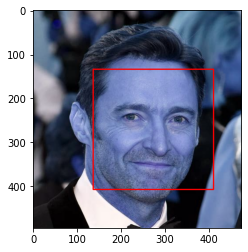

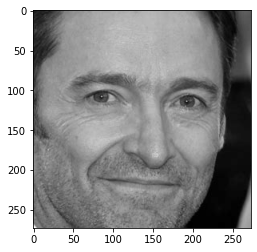

In [7]:
img = cv2.imread('./dataset/Hugh Jackman/005_3ba56da0.jpg')
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.5, 3)
print(len(faces))



(x,y,w,h) = faces[0]
x,y,w,h

face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)


c = 0
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

plt.figure()
plt.imshow(roi_gray, cmap='gray')
plt.show()


In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')


def get_cropped_image_if_1_face_detected(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        if len(faces) == 1:
            return roi_gray



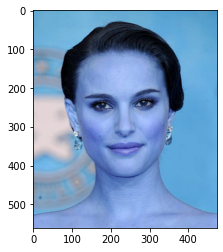

In [11]:


original_image = cv2.imread('./dataset/Natalie Portman/011_7b37bf1f.jpg')
plt.imshow(original_image)



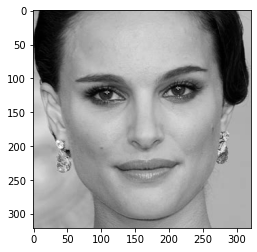

In [16]:


cropped_image = get_cropped_image_if_1_face_detected('./dataset/Natalie Portman/011_7b37bf1f.jpg')
plt.imshow(cropped_image, cmap='gray')


In [17]:
path_to_data = "./dataset/"
path_to_cr_data = "./cropped/"

In [18]:
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs


['./dataset/Hugh Jackman',
 './dataset/Natalie Portman',
 './dataset/Scarlett Johansson',
 './dataset/Tom Cruise',
 './dataset/Will Smith']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_gray = get_cropped_image_if_1_face_detected(entry.path)
        if roi_gray is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_gray)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./cropped/Hugh Jackman
Generating cropped images in folder:  ./cropped/Natalie Portman
Generating cropped images in folder:  ./cropped/Scarlett Johansson
Generating cropped images in folder:  ./cropped/Tom Cruise
Generating cropped images in folder:  ./cropped/Will Smith


In [22]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict



{'Hugh Jackman': ['./cropped/Hugh Jackman\\Hugh Jackman1.png',
  './cropped/Hugh Jackman\\Hugh Jackman10.png',
  './cropped/Hugh Jackman\\Hugh Jackman11.png',
  './cropped/Hugh Jackman\\Hugh Jackman12.png',
  './cropped/Hugh Jackman\\Hugh Jackman13.png',
  './cropped/Hugh Jackman\\Hugh Jackman14.png',
  './cropped/Hugh Jackman\\Hugh Jackman15.png',
  './cropped/Hugh Jackman\\Hugh Jackman16.png',
  './cropped/Hugh Jackman\\Hugh Jackman17.png',
  './cropped/Hugh Jackman\\Hugh Jackman18.png',
  './cropped/Hugh Jackman\\Hugh Jackman19.png',
  './cropped/Hugh Jackman\\Hugh Jackman2.png',
  './cropped/Hugh Jackman\\Hugh Jackman20.png',
  './cropped/Hugh Jackman\\Hugh Jackman21.png',
  './cropped/Hugh Jackman\\Hugh Jackman22.png',
  './cropped/Hugh Jackman\\Hugh Jackman23.png',
  './cropped/Hugh Jackman\\Hugh Jackman24.png',
  './cropped/Hugh Jackman\\Hugh Jackman25.png',
  './cropped/Hugh Jackman\\Hugh Jackman26.png',
  './cropped/Hugh Jackman\\Hugh Jackman27.png',
  './cropped/Hugh Jackman\

In [23]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict



{'Hugh Jackman': 0,
 'Natalie Portman': 1,
 'Scarlett Johansson': 2,
 'Tom Cruise': 3,
 'Will Smith': 4}

In [91]:
# Deep Learning CNN model to recognize face
'''This script uses a database of images and creates CNN model on top of it to test
   if the given image is recognized correctly or not'''
 
'''####### IMAGE PRE-PROCESSING for TRAINING and TESTING data #######'''
 
# Specifying the folder where images are present
TrainingImagePath='./cropped'
 
from keras.preprocessing.image import ImageDataGenerator
# Understand more about ImageDataGenerator at below link
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
 
# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
    rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
    validation_split=0.2,
        horizontal_flip=True)
 
# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator(rescale=1./255, 
                                 validation_split=0.2)
 
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
    subset='training',
        target_size=(64, 64),
        batch_size=64,
    seed=42,
    color_mode="grayscale",
        class_mode='categorical')
 
 
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
    subset='validation',
        target_size=(64, 64),
        batch_size=64,
    color_mode="grayscale",
    shuffle=False,
        class_mode='categorical')
 
# Printing class labels for each face
test_set.class_indices

Found 344 images belonging to 5 classes.
Found 84 images belonging to 5 classes.


{'Hugh Jackman': 0,
 'Natalie Portman': 1,
 'Scarlett Johansson': 2,
 'Tom Cruise': 3,
 'Will Smith': 4}

In [93]:
'''######################## Create CNN deep learning model ########################'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()
 
''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(64, kernel_size=(3,3), strides=(1, 1), input_shape=(64,64,1), activation='relu'))
 
'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))
# classifier.add(Dropout(0.1))
'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(128, kernel_size=(3,3), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))
# classifier.add(Dropout(0.1))


classifier.add(Convolution2D(256, kernel_size=(3,3), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))    

# classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
# classifier.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

'''# STEP--3 FLattening'''
classifier.add(Flatten())
 
'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))
# classifier.add(Dense(128, activation='relu'))
# classifier.add(Dense(256, activation='relu'))

classifier.add(Dense(5, activation='softmax'))
 
'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=1e-3), metrics=["accuracy"])
 
###########################################################
import time
# Measuring the time taken by the model to train
StartTime=time.time()

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.95 and logs.get('accuracy') >= 0.95):
            print("\nStop Training!")
            self.model.stop_training = True
callbacks = myCallback()    
    

# Starting the model training
history = classifier.fit(
                    training_set,
                    steps_per_epoch=int(np.ceil(344/64)),
                    epochs=1000,
                    validation_data=test_set,
                    validation_steps=int(np.ceil(84/64)),
                    callbacks=[callbacks])

Epoch 1/1000
6/6 [==============================] - 3s 382ms/step - loss: 1.6226 - accuracy: 0.2238 - val_loss: 1.6061 - val_accuracy: 0.2143
Epoch 2/1000
6/6 [==============================] - 2s 289ms/step - loss: 1.6044 - accuracy: 0.2151 - val_loss: 1.6005 - val_accuracy: 0.2143
Epoch 3/1000
6/6 [==============================] - 2s 290ms/step - loss: 1.5981 - accuracy: 0.2209 - val_loss: 1.5915 - val_accuracy: 0.2857
Epoch 4/1000
6/6 [==============================] - 2s 341ms/step - loss: 1.5911 - accuracy: 0.2442 - val_loss: 1.5789 - val_accuracy: 0.2619
Epoch 5/1000
6/6 [==============================] - 2s 306ms/step - loss: 1.5723 - accuracy: 0.3256 - val_loss: 1.5424 - val_accuracy: 0.3452
Epoch 6/1000
6/6 [==============================] - 2s 328ms/step - loss: 1.5198 - accuracy: 0.4564 - val_loss: 1.4750 - val_accuracy: 0.3214
Epoch 7/1000
6/6 [==============================] - 2s 298ms/step - loss: 1.4364 - accuracy: 0.4070 - val_loss: 1.3301 - val_accuracy: 0.3452
Epoch 

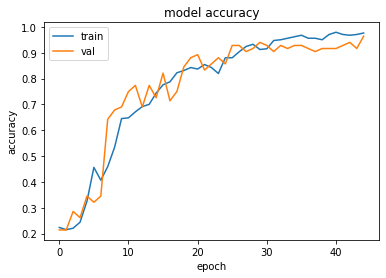

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [96]:
from sklearn.metrics import classification_report

validation_generator = test_set

predictions = classifier.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

2/2 [==============================] - 0s 26ms/step
                    precision    recall  f1-score   support

      Hugh Jackman       0.95      1.00      0.97        18
   Natalie Portman       1.00      0.83      0.91        18
Scarlett Johansson       0.89      1.00      0.94        17
        Tom Cruise       1.00      1.00      1.00        17
        Will Smith       1.00      1.00      1.00        14

          accuracy                           0.96        84
         macro avg       0.97      0.97      0.97        84
      weighted avg       0.97      0.96      0.96        84



In [97]:
classifier.save("./model/model.h5")